# Task-02 : Customer Segmentation

## Introduction:

### Objective:

The objective of this dataset is to analyze and understand customer behavior in a retail environment based on their demographics and spending habits. Specifically, it focuses on identifying patterns and segments among customers using features such as gender, age, annual income, and spending score.

### Dataset:

The dataset used for this analysis is the "Mall Customers" dataset. It contains information about 200 customers of a mall, including their ID, gender, age, annual income, and spending score. The dataset consists of the following columns:

1. CustomerID: Unique ID assigned to each customer.
2. Gender: Gender of the customer (Male or Female).
3. Age: Age of the customer.
4. Annual Income (k$): Annual income of the customer in thousands of dollars.
5. Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.



# Step 01 : Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [2]:
# Load the dataset
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Display the first five rows of the dataframe
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check the shape of the dataset (number of rows and columns)
customer_data.shape

(200, 5)

In [5]:
# Display a concise summary of the dataset (including data types)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Check for any missing values in the dataset
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Step 03 : Visualizing the distribution of Key Variables

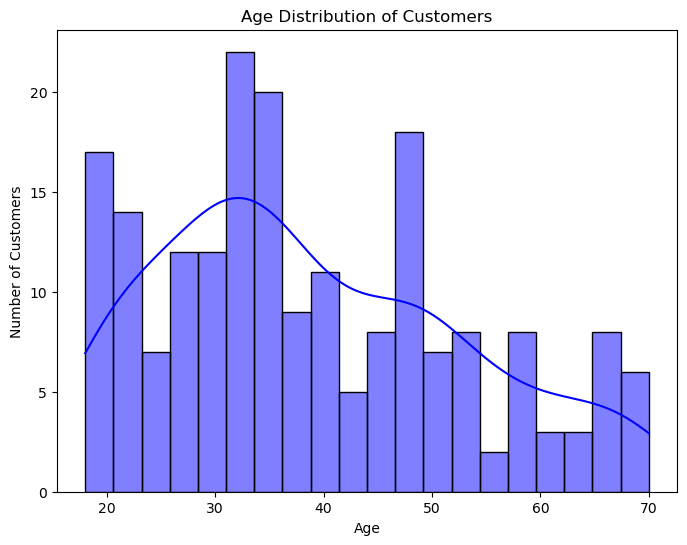

In [7]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

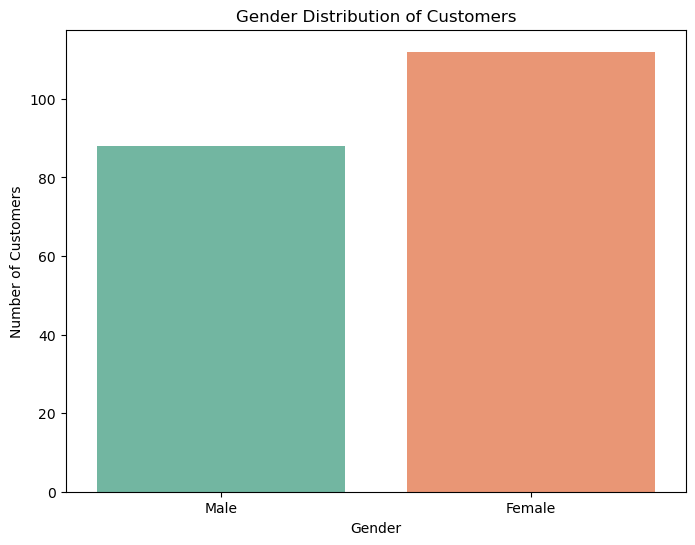

In [8]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=customer_data, palette='Set2')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

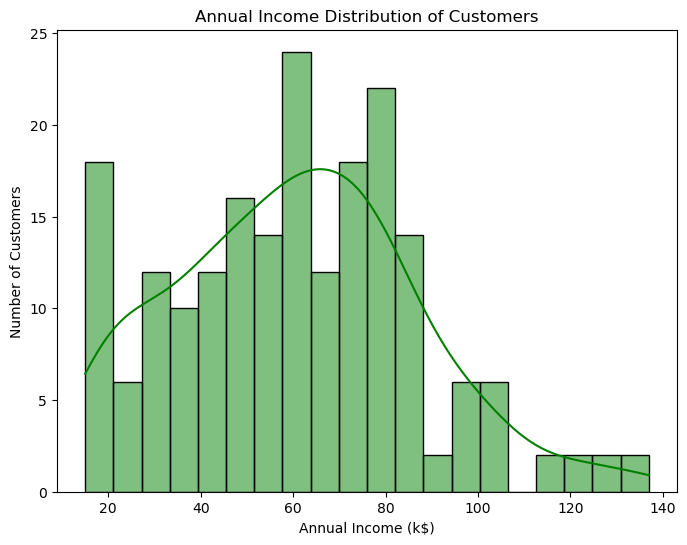

In [9]:
# Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Annual Income Distribution of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

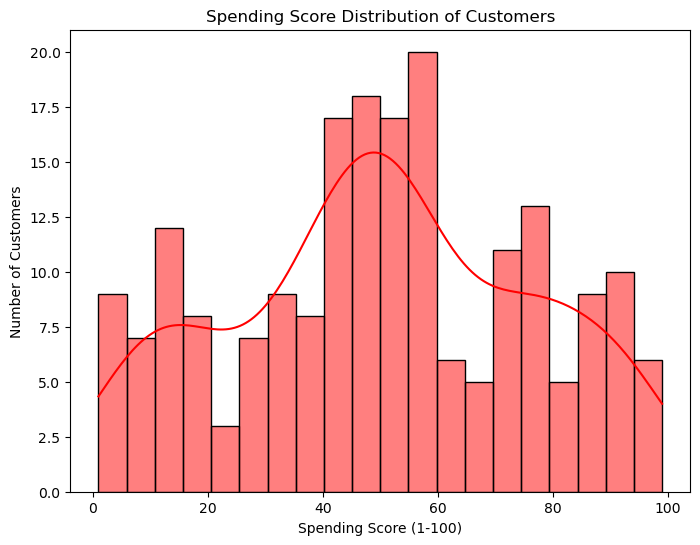

In [10]:
# Spending Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Spending Score Distribution of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()

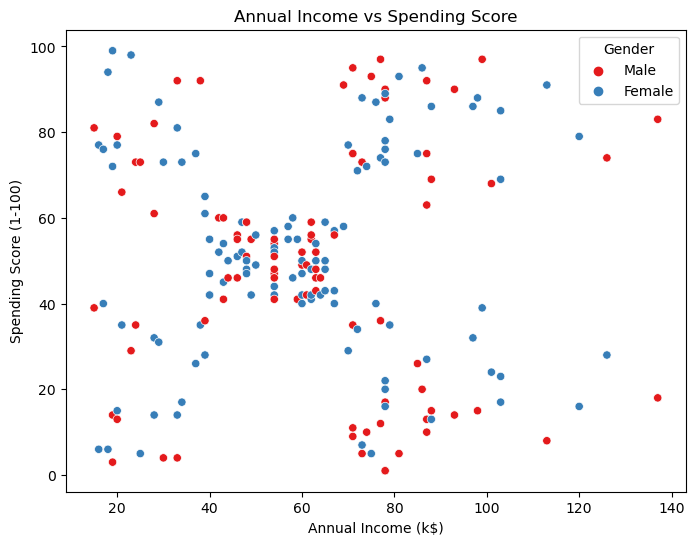

In [11]:
# Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_data, hue='Gender', palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

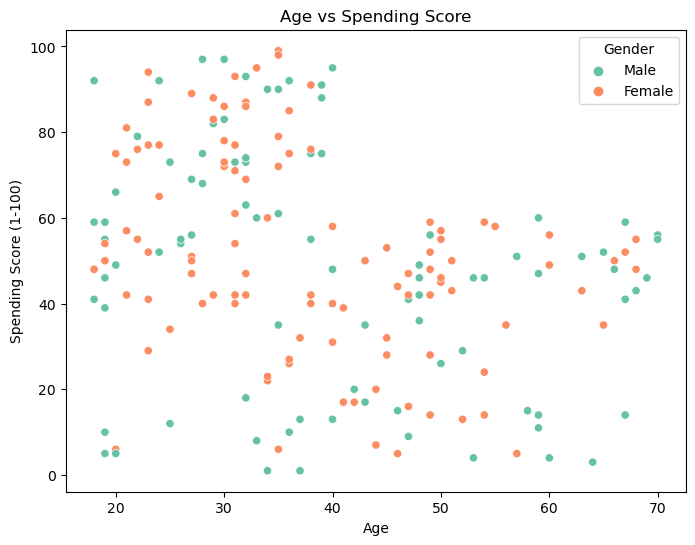

In [12]:
# Age vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=customer_data, hue='Gender', palette='Set2')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

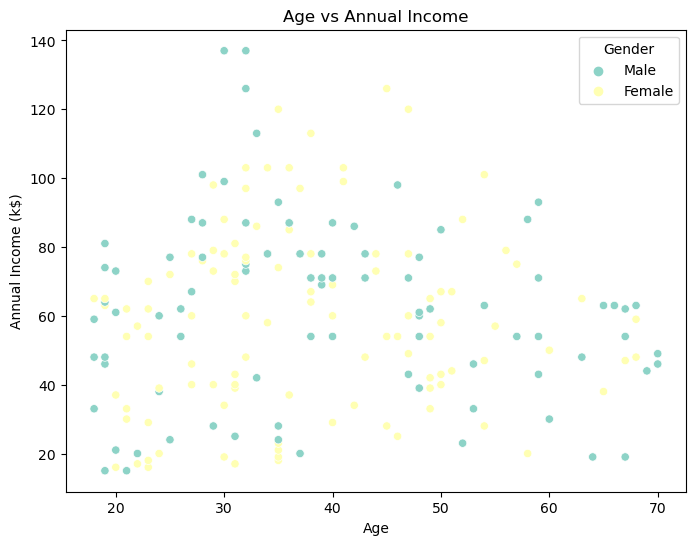

In [13]:
# Age vs Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=customer_data, hue='Gender', palette='Set3')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender')
plt.show()

# Step 04 : Choose the Annual Income Column and Spending Score Column

In [14]:
# Select the 'Annual Income' and 'Spending Score' columns for clustering
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Step 05 : Choosing the number of Clusters

## WCSS -> Within Clusters Sum of Squares

In [15]:
# Select only the 'Annual Income' and 'Spending Score' columns for clustering
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [16]:
# Calculate WCSS for different numbers of clusters to determine the optimal number
wcss = [KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X).inertia_ for i in range(1, 11)]

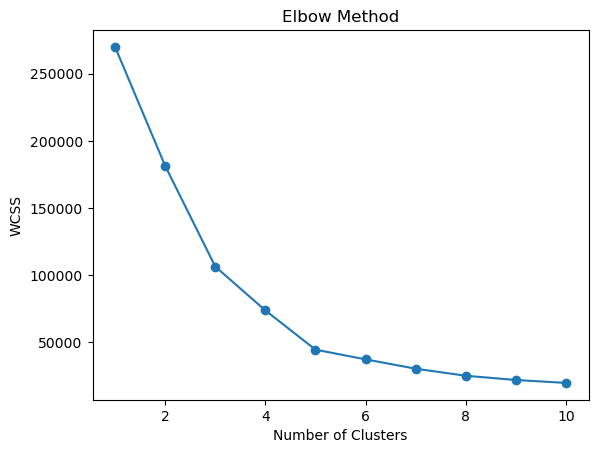

In [17]:
# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Optimum Number of Clusters = 5

# Step 06 : Training the K-Means Clustering Model

In [18]:
# Train the K-Means model with the optimal number of clusters (5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### 5 Clusters-> 0,1,2,3,4

# Step 07 : Visualizing all the clusters

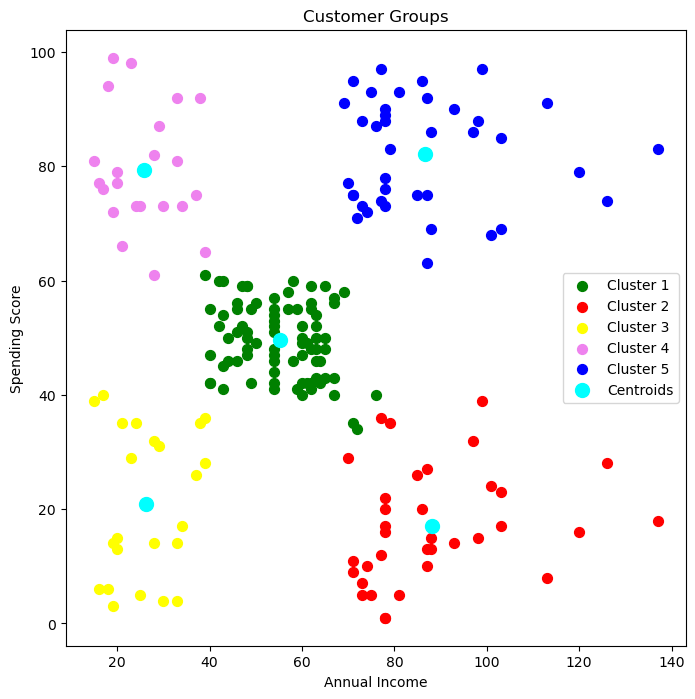

In [19]:
# Plotting all the clusters and their centroids
colors = ['green', 'red', 'yellow', 'violet', 'blue']
plt.figure(figsize=(8, 8))
for i in range(5):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, c=colors[i], label=f'Cluster {i + 1}')
    
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Step 08 : Further Analysis

In [20]:
# Add the cluster labels to the dataset
customer_data['Cluster'] = Y

# Count of customers in each cluster
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
print("\nNumber of Customers in each Cluster:\n", cluster_counts)


Number of Customers in each Cluster:
 Cluster
0    81
1    35
2    23
3    22
4    39
Name: count, dtype: int64


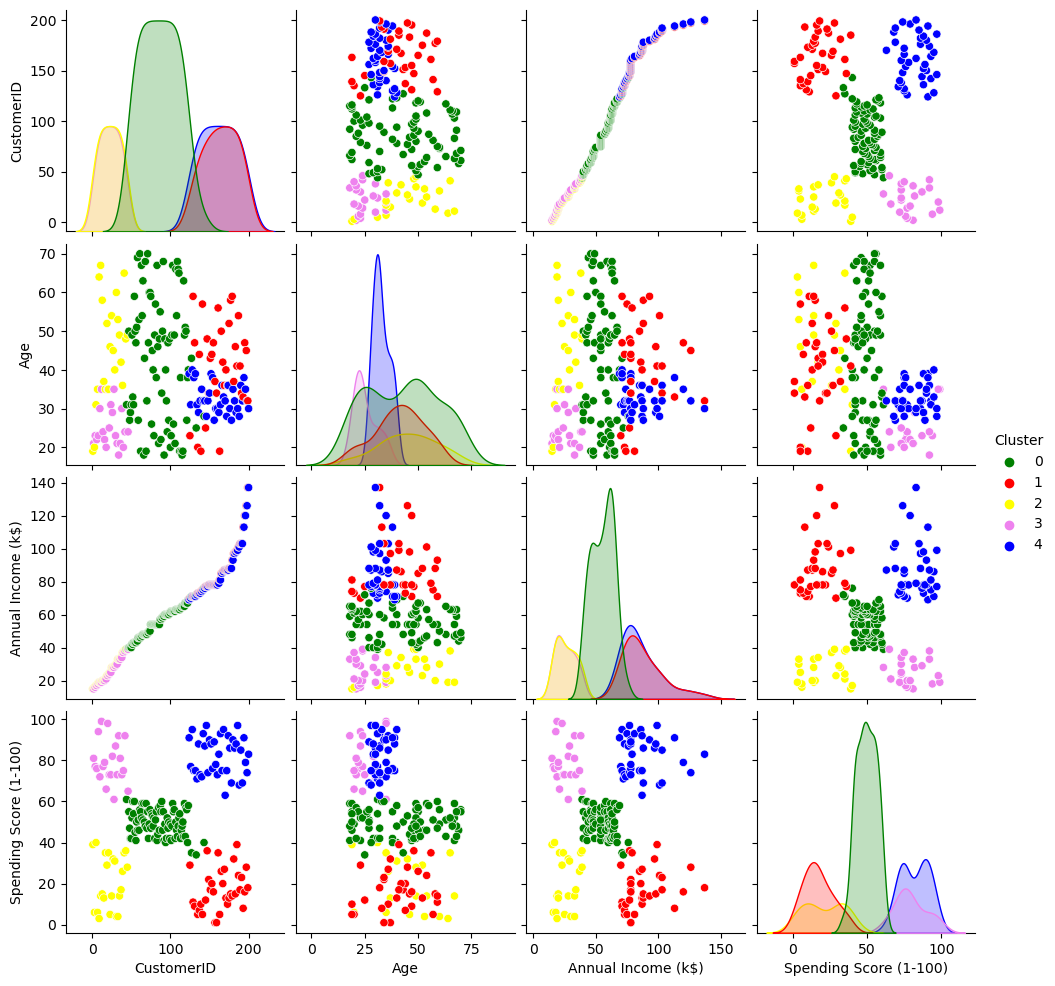

In [21]:
# Pairplot to visualize relationships between features
sns.pairplot(customer_data, hue='Cluster', palette=colors)
plt.show()

In [22]:
# Display the Centroid values for each cluster
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroid_df.index = [f'Cluster {i + 1}' for i in range(5)]
print("\nCluster Centroid Values:\n", centroid_df)


Cluster Centroid Values:
            Annual Income (k$)  Spending Score (1-100)
Cluster 1           55.296296               49.518519
Cluster 2           88.200000               17.114286
Cluster 3           26.304348               20.913043
Cluster 4           25.727273               79.363636
Cluster 5           86.538462               82.128205


## Key Findings:


1. The dataset has been explored, showing distributions of key variables like Age, Gender, Annual Income, and Spending Score, with visualizations for deeper insights.
2. The clustering analysis uses Annual Income and Spending Score to segment customers.
3. The Elbow method indicates that 5 clusters is the optimal number for grouping customers based on their income and spending behavior.
4. Customers are segmented into 5 distinct clusters.
5. A scatter plot visualizes the clusters and their centroids, showing how customers are grouped based on their annual income and spending scores.
6. Cluster analysis provides insights into the number of customers per cluster, relationships between features through pairplots, and the average income and spending score for each cluster's centroid.

